La consigna de todo el codigo que se va a realizar en este colab se encuentra en el siguiente link:

https://github.com/IgnacioPardo/Tecnologias_Exponenciales_2023/blob/main/Consigna_ModelosPredictivos.md

1. Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase

La dataset que utilizaremos para este Trabajo Practico es la siguiente:

https://www.kaggle.com/datasets/zhikchen/lebron-james-regular-season-games-2003-current?resource=download

In [3]:
import pandas as pd
import seaborn as sns
%pip install -U scikit-learn
import sklearn
import re

In [4]:
df = pd.read_csv("/content/Lebron_James_All_Regular_Season_Stats.csv")
df.sample(4)

,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
965,55,2016-02-24,31-056,CLE,NaN,CHO,W (+11),1.0,30:19,8,...,6,7,7,2,0,2,1,23,22.9,4.0
1003,17,2016-12-02,31-338,CLE,@,CHI,L (-6),1.0,44:40,13,...,5,5,13,0,0,8,2,27,18.6,-2.0
560,13,2010-11-20,25-325,MIA,@,MEM,L (-2),1.0,42:06,11,...,3,3,11,1,0,4,2,29,21.7,-1.0
842,1,2014-10-30,29-304,CLE,NaN,NYK,L (-5),1.0,43:14,5,...,5,5,4,0,0,8,3,17,3.2,-13.0


In [5]:
df = df.drop(columns=["Unnamed: 5","GS","PF"], axis = 1)

Eliminamos la cantidad de diferencia de puntos al lado del W (Win) o de la L (Lose)

In [6]:
def quitar_parentesis(resultado):
    clean_result = re.sub(r'\s*\(\s*[+-]?\d+\s*\)', '', resultado)
    return clean_result

df ["Unnamed: 7"] = df['Unnamed: 7'].apply(quitar_parentesis)
df = df.rename(columns={"Unnamed: 7" : "Wins(1) or Loses(0)"})
df.sample(4)
df = df.dropna()

2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

<Axes: xlabel='PTS', ylabel='GmSc'>

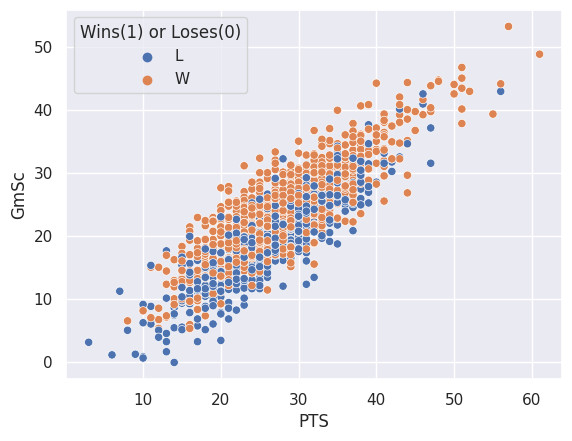

In [7]:
# Apply the default theme
sns.set_theme()

sns.scatterplot(data=df,
                x="PTS",
                y="GmSc",
                hue="Wins(1) or Loses(0)"
               )

En el grafico que se muestra arriba, podemos observar como a medida que mas puntos tiene lebron James, mas aumenta su game score por consecuencia claramente

<Axes: xlabel='+/-', ylabel='PTS'>

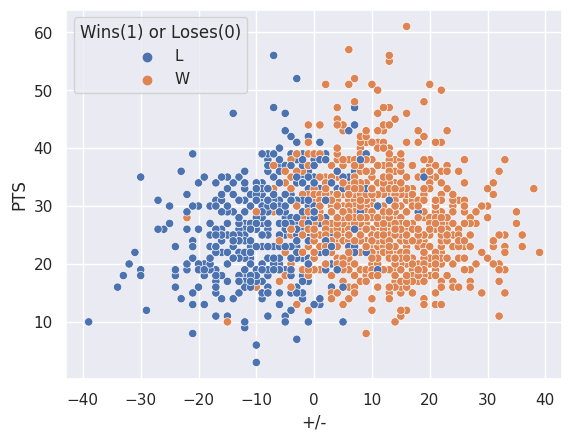

In [8]:
sns.scatterplot(data=df,
                x="+/-",
                y="PTS",
                hue="Wins(1) or Loses(0)"
               )

En el grafico de arriba, podemos ver como no solo sus puntos son lo que marcan su valoracion. Si queda en negativa su valoracion no depende solo de sus puntos en el partido, sino que tambien incluye sus asistencias y demas cosas

3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [9]:
cat = df["Wins(1) or Loses(0)"]

num = df[["PTS", "FG%", "3P%", "FT%", "TRB", "AST", "STL", "BLK", "TOV", "GmSc", "+/-"]]

cat = df["Wins(1) or Loses(0)"].map({'W': 1, 'L': 0})

cat.shape, num.shape

((1366,), (1366, 11))

4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(num, cat, test_size=0.5, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5097478282826005

Para el atributo numérico a predecir seleccionado:

- Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
- Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = num
y = cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

regressor = DecisionTreeRegressor(random_state=0, min_samples_split = 5)

puntuacion= cross_val_score(regressor, X_train, y_train, cv=10)

print("Puntuaciones: ", puntuacion)

promedio = puntuacion.mean()

print("Promedio de puntuaciones: ", promedio)

Puntuaciones:  [0.47733918 0.07094595 0.10772642 0.31340939 0.45401531 0.30672269
 0.55338346 0.36692995 0.31259936 0.6412037 ]
Promedio de puntuaciones:  0.36042754166109425


- Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

**¿Que formas tienen de evaluar los resultados de cada árbol de decisión? **

Para poder evaluar correctamente a un arbol de decision se debe tener en cuenta varios factores. Empezando por el mas basico, podriamos decir que la precision de este arbol, mientras mas alta sea mejor sera este. Obviamente, como podemos deducir, no es asi de sencillo., hay mas factores a tener en cuenta. Por ejemplo, los falsos positivos y falsos negativos. Hay valores los cuales para el arbol de decision son positivos o negativos y realmente estos no lo son y esto afecta a la precision del modelo. Tambien hay diferentes funciones las cuales miden el rango de error del modelo, de esta manera, se sabe con mayor precision cual es el resultado exacto que tira el arbol ya que se excluyen algunos valores que esten dentro del rango anteriormente nombrado.


**Como se elige el mejor arbol?**

El mejor arbol se elige a traves de los hiperparametros ya que estos le indican exactamente como deebe funcionar al modelo. Por ejemplo, en el bloque de codigo que se programo arriba, se le indican hiperparametros como random_state y min_samples_split los cuales ayudan a que el promedio de las puntuaciones del modelo sea mayor. Ademas de esto, la validacion cruzada nos ayuda ya que esta se encarga de evaluar el rendimiento del modelo y seleccionar el mejor conjunto de datos para que este tenga el mejor rendimiento posible.


**¿Como se comparan los resultados de los modelos de regresion lineal y de arbol de decision? **

En nuestro caso para comparar los resultados de los modelos aplicados anteriormente utilizamos CROSS_VAL_SCORE y luego hicimos el promedio de estas valoraciones cruzadas para luego comparar el numero dado. Sabiendo que el modelo de regresion lineal no puede manejar relaciones complejas como el arbol de decision podemos deducir que tan exacto es el modelo de regresion linea.


6. Para el atributo categórico a predecir seleccionado

- Realizar un modelo de clasificación utilizando la clase LogisticRegression de   SciKit-Learn.

- Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier  de SciKit-Learn.

In [39]:
from sklearn.linear_model import LogisticRegression

X = num
y = cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

''' Probamos aumentando y disminuyendo el hiperparametro de MAX_ITER y cuando se disminuye significativamente el score disminuye con este y al reves de como uno se imagina, aunque aumentemos el MAX_ITER
significativamente el score en si no aumenta casi nada, simplemente decimales '''

logistic = LogisticRegression(random_state=0, max_iter = 250, fit_intercept = False).fit(X_train, y_train)

print("La prediccion dada por el metodo predict es de: ", logistic.predict(X))

print("\n" + "Para conocer que tan precisa es la prediccion anteriormente realizada utilizamos el siguiente metodo el cual devolvio el siguiente resultado: ", logistic.predict_proba(X))

print("\n" + "Finalmente, conocemos el score final dandole como entrada de datos X e y: ", logistic.score(X, y))

La prediccion dada por el metodo predict es de:  [0 0 0 ... 0 1 1]

Para conocer que tan precisa es la prediccion anteriormente realizada utilizamos el siguiente metodo el cual devolvio el siguiente resultado:  [[0.88872098 0.11127902]
 [0.73401506 0.26598494]
 [0.99824735 0.00175265]
 ...
 [0.9488157  0.0511843 ]
 [0.0697125  0.9302875 ]
 [0.00244766 0.99755234]]

Finalmente, conocemos el score final dandole como entrada de datos X e y:  0.8799414348462665


In [14]:
from sklearn.tree import DecisionTreeClassifier

X = num
y = cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = DecisionTreeClassifier(random_state=0, min_samples_split = 5, max_features = 10, max_depth = 4)

scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')

print("Puntuaciones de validación cruzada:", scores)

mean_accuracy = scores.mean()
print("\n" + "Precisión media:", mean_accuracy)

Puntuaciones de validación cruzada: [0.9270073  0.90510949 0.86131387 0.89051095 0.83941606 0.89781022
 0.82352941 0.83823529 0.84558824 0.82352941]

Precisión media: 0.8652050236152856


Responder las mismas preguntas que en el punto 5 para este caso.

- Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

- ¿Que formas tienen de evaluar los resultados de cada árbol de decisión?

Al igual que en el caso anterior, para poder evaluar correctamente a un arbol de decision se debe tener en cuenta varios factores. Al igual que el modelo anterior, para poder evaluar los resultados utilizamos las valoraciones cruzadas y a traves del promedio de estas pudimos evaluar que tan bien fueron los hiperparametros utilizados. Al igual que antes, hay diferentes funciones las cuales miden el rango de error del modelo, de esta manera, se sabe con mayor precision cual es el resultado exacto que tira el arbol ya que se excluyen algunos valores que esten dentro del rango anteriormente nombrado.

- ¿Como eligen "el mejor arbol"?

Para elegir el mejor arbol nosotros fuimos probando diferentes hiperparametros y cambiando los valores de estos ultimos. Como se ve en el bloque de arriba, utilizamos 4 hiperparametros al momento de crear el arbol de decision. Estos mismos le indican al modelo como debe funcionar y como debe hacer las cosas y a traves de la prueba y error nosotros encontramos lo que creemos que fue lo mejor

- ¿Como se comparan los resultados de los modelos de regresion Logistica y de arbol de decision?

Al igual que en el caso anterior, para poder comparar los modelos de regresion logistica y el arbol de decision nosotros utilizamos las validaciones cruzadas para luego hacer un promedio de estas. Luego de hacer este promedio, nos fijamos cual de los dos valores es mayor al otro y de esta manera deducimos a simple vista cual tiene mayor precision dejando de lado los factores mencionados en las preguntas anteriores.

7. Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

8. Escribir una conclusión sobre el trabajo realizado.

7. Para poder responder esta pregunta haremos dos listas, una de ventajas y otra de desventajas para cada uno de los metodos.

**- metodo de k-fold:**

*ventajas: *

- Utiliza todos los datos disponibles en un dataset, tanto en la etapa de train como de test asi que no se deja ningun dato sin utilizar

- Es muy sencillo aplicarlo en codigo y no es necesario conocerlo de antemano para poder utilzarlo en si

- Compara todos los datos entre si teniendo una mayor posibilidad de que sea preciso

*Desventajas:*

- Si el conjunto de datos es muy grande, se va a requerir una PC mas potente para poder procesar todos estos y compararlos a todos entre si

- En el caso de no tener una PC muy potente, se va a requerir mucho mas tiempo para poder recorrer todos los conjunto de datos


**- metodo Leave-One-Out**

*- ventajas:*

- Este metodo suele ser muy exacto ya que se crean tantos modelos como datos que existan en el dataset

- Por consecuencia de lo anterior, suele tener una medida mas clara del MSE (mean squared error). Este mismo lo que hace es estimar el promedio de los errores dados en el modelo al cuadrado

*- Desventajas:*

- Al igual que el metodo anterior, se requieren muchos recursos en una PC para que este metodo corra bien si la cantidad de datos es muy grande

- Requiere bastante tiempo para que este metodo termine el proceso de validar los datos

**- metodo Leave-P-Out**

*- ventajas:*

- Este tiene unas ventajas similares al metodo LEAVE-ONE-OUT

- La diferencia viene aca. Al ingresar un conjunto de datos P como datos de entrenamiento, el proceso de validacion es mas rapido ya que en vez de ser un solo dato, son P cantidad de datos.

*- Desventajas:*

- Al ser un metodo muy similar al anterior, sus desventajas se mantienen en las mismas que el modelo anteriormente explicado.




8.

En este TP nosotros pudimos observar diferentes modelos de clasificacion, de regresion y formas de validar los resultados que estos modelos nos ofrecian. Aprendimos diferentes herramientas y conceptos como los diferentes metodos de validacion cruzada que existen. Ademas de esto, pudimos comprender con mas claridad como se puede hacer para que un modelo funcione de manera mas efectiva a comparacion al resto gracias a los hiperparametros dados.

  Nos parecio medio complicado al principio, ya que no teniamos mucha idea de como funcionaban los modelos en si, pero luego de investigaciones por cuenta propia y explicaciones del profesor (chona) pudimos entender como estos funcionaban y de esta manera, poder realizar el TP con mayor facilidad.

  Para concluir, podriamos decir que aprendimos varios conceptos pero mas alla de esto, nos gustaria poder naturalizar todo este conocimiento. Ya que, a pesar de todo lo aprendido, sentimos que nos falta facilidad a la hora de programar, aunque sabemos bien que esta misma se consigue sentandose y programando, asi que a seguir metiendole al VISUAL CODE.



###Bonus

- Investigar los métodos `GridSearch` y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos.

A continuacion buscamos con GRIDSEARCH los mejores parametros para el modelo DecisionTreeClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svc = svm.SVC()
param_grid = {"min_samples_split":  [1,6], "max_features" : [4,10], "max_depth" : [1,4]}

search = GridSearchCV(estimator=DecisionTreeClassifier(),
                      param_grid=param_grid)

search.fit(X_train, y_train)

search.cv_results_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

{'mean_fit_time': array([0.00156541, 0.00440645, 0.00112724, 0.00505562, 0.00142245,
        0.00556159, 0.00114503, 0.00706029]),
 'std_fit_time': array([7.31471890e-04, 2.94619463e-04, 9.39924541e-05, 2.53316499e-04,
        6.17782103e-04, 2.26550548e-04, 7.81173081e-05, 1.43288495e-04]),
 'mean_score_time': array([0.        , 0.00358438, 0.        , 0.00356965, 0.        ,
        0.00371175, 0.        , 0.00390706]),
 'std_score_time': array([0.00000000e+00, 1.15470625e-04, 0.00000000e+00, 6.22763568e-05,
        0.00000000e+00, 1.39606357e-04, 0.00000000e+00, 1.01116082e-04]),
 'param_max_depth': masked_array(data=[1, 1, 1, 1, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[4, 4, 10, 10, 4, 4, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_sampl

Como podemos ver en el output, se devolvieron varias combinaciones de parametros para luego probarlos y ver cual es el que mejor funciona

Ahora con RandomSearch

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = dict(C = uniform (loc=0, scale=4), penalty = ['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(X_train, y_train)

search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

{'C': 2.4942547871438894, 'penalty': 'l2'}

Como pudimos ver arriba, el resultado del la funcion RandomizedSearchCV fue el siguiente:



```
{'C': 2.4942547871438894, 'penalty': 'l2'}
```




- Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.

Para este ultimo punto elegimos el siguiente modelo: RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

randomfc = RandomForestClassifier(max_depth=2, random_state=0, min_samples_split = 4, verbose = 3, max_samples = 10)

randomfc.fit(X_train, y_train)

print(randomfc.score(X_test, y_test))


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.3s


building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s


Como podemos observar en el output de arriba, el resultado de este modelo fue el siguiente:



```
0.8585365853658536
```



A comparacion del modelo **DecisionTreeClassifier ** podriamos decir que el resultado es bastante similar, ya que el de este ultimo fue de ```0.8652050236152856```



